## Simple Linear Regression Baseline

The target variable, wave heights, is technically continuous. However, in this case, 'nshor' comes in the form of discrete human perception data. As such, my approach is to frame the task as a regresion problem, with a view to rounding predictions to align with the discrete targets. In this notebook, my goal is to build a baseline linear regression model.

The model was initially tested using the top 15 ranked features produced by the previous notebook (02), but the final version leverages all 29 features.


**-- Results --**

Baseline Linear Regression Model

Mean Squared Error: 1.0362903225806452

R-squared Score: 0.9337685134935378


**-- New Feature Importance Ranking (Top 15) --**

WVHT_max_DPD_mean_interact

WVHT_max

WVHT_max_APD_interact_log^2

wave_power

APD_2d_avg

APD_2d_avg_log

WVHT_max_2d_avg

DPD_mean

DPD_mean_wave_power_interact^2

WVHT_max_MWD_interact

APD_3d_avg

wave_power_2d_avg_log

WVHT_max_3d_avg_log

MWD_at_peak

MWD_3d_avg

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)

## Import Data

In [2]:
# Load the preprocessed data
df = pd.read_csv('~/Projects/surfline/data/preprocessed.dat', index_col=0, parse_dates=True)
print(f"Data shape: {df.shape}")
# df.head()

Data shape: (2480, 30)


In [3]:
df.columns

Index(['WVHT_max', 'DPD_at_peak', 'DPD_mean', 'APD_mean', 'MWD_at_peak',
       'MWD_mean', 'wave_power', 'WVHT_max_2d_avg', 'MWD_2d_avg', 'APD_2d_avg',
       'DPD_mean_2d_avg', 'wave_power_2d_avg', 'WVHT_max_3d_avg', 'MWD_3d_avg',
       'APD_3d_avg', 'DPD_mean_3d_avg', 'wave_power_3d_avg',
       'WVHT_max_MWD_interact', 'WVHT_max_DPD_mean_interact',
       'WVHT_max_2d_avg_log', 'APD_2d_avg_log', 'wave_power_2d_avg_log',
       'WVHT_max_3d_avg_log', 'MWD_wave_power_interact_log', 'nshor',
       'DPD_mean_wave_power_interact^2', 'WVHT_max_APD_interact^2',
       'WVHT_max_APD_interact_log^2', 'day_cos', 'is_winter'],
      dtype='object')

## Preprocessing

In [4]:
# List ofs columns to use as features -- all 29 available features
feature_columns = ['WVHT_max', 'DPD_at_peak', 'DPD_mean', 'APD_mean', 'MWD_at_peak',
       'MWD_mean', 'wave_power', 'WVHT_max_2d_avg', 'MWD_2d_avg', 'APD_2d_avg',
       'DPD_mean_2d_avg', 'wave_power_2d_avg', 'WVHT_max_3d_avg', 'MWD_3d_avg',
       'APD_3d_avg', 'DPD_mean_3d_avg', 'wave_power_3d_avg',
       'WVHT_max_MWD_interact', 'WVHT_max_DPD_mean_interact',
       'WVHT_max_2d_avg_log', 'APD_2d_avg_log', 'wave_power_2d_avg_log',
       'WVHT_max_3d_avg_log', 'MWD_wave_power_interact_log',
       'DPD_mean_wave_power_interact^2', 'WVHT_max_APD_interact^2',
       'WVHT_max_APD_interact_log^2', 'day_cos', 'is_winter']

# Initial testing leveraged the top 15 features from the previous notebook (02)
# feature_columns = ['WVHT_max_DPD_mean_interact', 'DPD_mean_wave_power_interact^2', 'WVHT_max_APD_interact^2',
#                    'WVHT_max_APD_interact_log^2', 'APD_mean', 'APD_2d_avg_log', 'MWD_wave_power_interact_log',
#                    'DPD_mean_2d_avg', 'wave_power', 'DPD_mean', 'APD_2d_avg', 'wave_power_2d_avg_log', 'MWD_mean',
#                    'wave_power_2d_avg', 'DPD_mean_3d_avg']

# Specify target variable
target_column = 'nshor'

# Create X (features) and y (target)
X = df[feature_columns]
y = df[target_column]

In [5]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # using the same scale fitted on the training data to avoid data leakage

## Train Linear Regression Model

In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate Model

In [8]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_rounded = np.round(y_pred)

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rounded)
r2 = r2_score(y_test, y_pred_rounded)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1.0362903225806452
R-squared Score: 0.9337685134935378


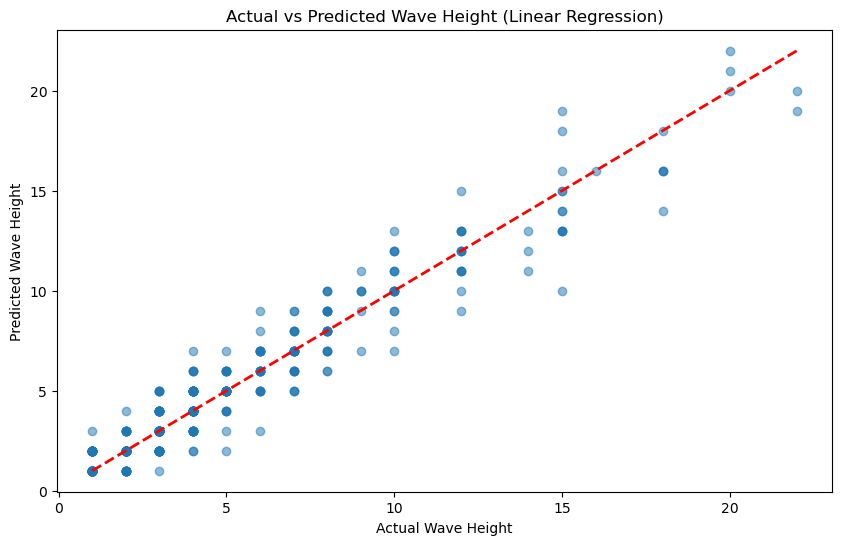

In [10]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rounded, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Wave Height")
plt.ylabel("Predicted Wave Height")
plt.title("Actual vs Predicted Wave Height (Linear Regression)")
plt.show()

In [11]:
# Feature importance
coefficients = pd.DataFrame({'Feature': feature_columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print(coefficients)

                           Feature  Coefficient
18      WVHT_max_DPD_mean_interact     3.768914
0                         WVHT_max    -2.736418
26     WVHT_max_APD_interact_log^2     1.842692
6                       wave_power     1.477206
9                       APD_2d_avg     1.360958
20                  APD_2d_avg_log    -1.319550
7                  WVHT_max_2d_avg    -0.747457
2                         DPD_mean    -0.584403
24  DPD_mean_wave_power_interact^2    -0.505156
17           WVHT_max_MWD_interact     0.379083
14                      APD_3d_avg     0.358763
21           wave_power_2d_avg_log     0.337129
22             WVHT_max_3d_avg_log    -0.330557
4                      MWD_at_peak    -0.315508
13                      MWD_3d_avg     0.273262
11               wave_power_2d_avg     0.266195
5                         MWD_mean     0.189746
10                 DPD_mean_2d_avg     0.160117
8                       MWD_2d_avg    -0.125947
3                         APD_mean     0